In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 hours 59 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.522 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [2]:
#By: Amr Ezzat

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

import h2o
from h2o.automl import H2OAutoML

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.8MB 70kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=b36df974da58850735e8b4ff885193d3980c0264fd7db4172f02494b652979be
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


In [4]:
h2o.init()
path = 'https://raw.githubusercontent.com/PaoloMissier/DataScience-class-demos/master/DATA/titanic.csv'

titanic_ds = h2o.import_file(path=path) 

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvhcs5p1f
  JVM stdout: /tmp/tmpvhcs5p1f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvhcs5p1f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_mgkjvx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
titanic_ds

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.925
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1
0,3,Mr. William Henry Allen,male,35,0,0,8.05
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.075
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708


In [6]:
titanic_ds["Survived"]= titanic_ds["Survived"].asfactor()

In [7]:
titanic_ds.describe()

Rows:887
Cols:8




,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
type,enum,int,string,enum,real,int,int,real
mins,,1.0,NaN,,0.42,0.0,0.0,0.0
mean,,2.3055242390078914,NaN,,29.47144306651637,0.5253664036076668,0.38331454340473503,32.30542018038329
maxs,,3.0,NaN,,80.0,8.0,6.0,512.3292
sigma,,0.8366620036697728,NaN,,14.121908405462552,1.104668553867569,0.8074659070316833,49.78204040017391
zeros,,0,0,,0,604,674,15
missing,0,0,0,0,0,0,0,0
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.25
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1.0,0.0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.925


In [8]:
t_train,t_test= titanic_ds.split_frame(ratios=[.8])

In [9]:
y = "Survived"
x = titanic_ds.columns
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models = 20, seed = 1234, verbosity="info")
aml.train(x=x, y=y, training_frame=t_train)

AutoML progress: |
18:38:36.507: Project: AutoML_20210414_183836500
18:38:36.509: Setting stopping tolerance adaptively based on the training frame: 0.03766217885773547
18:38:36.509: Build control seed: 1234
18:38:36.510: training frame: Frame key: automl_training_py_3_sid_ae2b    cols: 8    rows: 705  chunks: 1    size: 30002  checksum: 8972482127632500564
18:38:36.510: validation frame: NULL
18:38:36.510: leaderboard frame: NULL
18:38:36.510: blending frame: NULL
18:38:36.511: response column: Survived
18:38:36.511: fold column: null
18:38:36.511: weights column: null
18:38:36.554: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
18:38:36.584: AutoML job created: 2021.04.14 18:38:36.500
18:38:36.585: AutoML build started: 2021.04.14 18:38:36.584
18:38:36.59

In [ ]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210410_231428,0.839461,0.455219,0.815569,0.202641,0.378977,0.143623
GLM_1_AutoML_20210410_231428,0.837822,0.464713,0.799894,0.226121,0.385821,0.148858
GBM_grid__1_AutoML_20210410_231428_model_2,0.835136,0.461609,0.816725,0.205784,0.380831,0.145032
XGBoost_grid__1_AutoML_20210410_231428_model_4,0.833785,0.464976,0.809355,0.209434,0.382565,0.146356
GBM_grid__1_AutoML_20210410_231428_model_1,0.83327,0.454166,0.816582,0.207271,0.378554,0.143303
StackedEnsemble_AllModels_AutoML_20210410_231428,0.832714,0.453082,0.809574,0.194741,0.376345,0.141635
GBM_2_AutoML_20210410_231428,0.831845,0.457219,0.817366,0.203622,0.376833,0.142003
XGBoost_1_AutoML_20210410_231428,0.831083,0.471449,0.805502,0.218443,0.385686,0.148754
GBM_3_AutoML_20210410_231428,0.830428,0.464844,0.8167,0.200648,0.379389,0.143936
XRT_1_AutoML_20210410_231428,0.82925,0.483153,0.800423,0.208981,0.387443,0.150112


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_AutoML_20210410_231428,0.839461,0.455219,0.815569,0.202641,0.378977,0.143623,133,0.094243,StackedEnsemble
GLM_1_AutoML_20210410_231428,0.837822,0.464713,0.799894,0.226121,0.385821,0.148858,115,0.011167,GLM
GBM_grid__1_AutoML_20210410_231428_model_2,0.835136,0.461609,0.816725,0.205784,0.380831,0.145032,92,0.03004,GBM
XGBoost_grid__1_AutoML_20210410_231428_model_4,0.833785,0.464976,0.809355,0.209434,0.382565,0.146356,66,0.009916,XGBoost
GBM_grid__1_AutoML_20210410_231428_model_1,0.83327,0.454166,0.816582,0.207271,0.378554,0.143303,94,0.021942,GBM
StackedEnsemble_AllModels_AutoML_20210410_231428,0.832714,0.453082,0.809574,0.194741,0.376345,0.141635,134,0.049665,StackedEnsemble
GBM_2_AutoML_20210410_231428,0.831845,0.457219,0.817366,0.203622,0.376833,0.142003,260,0.017899,GBM
XGBoost_1_AutoML_20210410_231428,0.831083,0.471449,0.805502,0.218443,0.385686,0.148754,340,0.018093,XGBoost
GBM_3_AutoML_20210410_231428,0.830428,0.464844,0.8167,0.200648,0.379389,0.143936,94,0.020203,GBM
XRT_1_AutoML_20210410_231428,0.82925,0.483153,0.800423,0.208981,0.387443,0.150112,112,0.028674,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_AutoML_20210410_231428


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4887605377468493: 


,,0,1,Error,Rate
0,0,405.0,38.0,0.0858,(38.0/443.0)
1,1,61.0,213.0,0.2226,(61.0/274.0)
2,Total,466.0,251.0,0.1381,(99.0/717.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

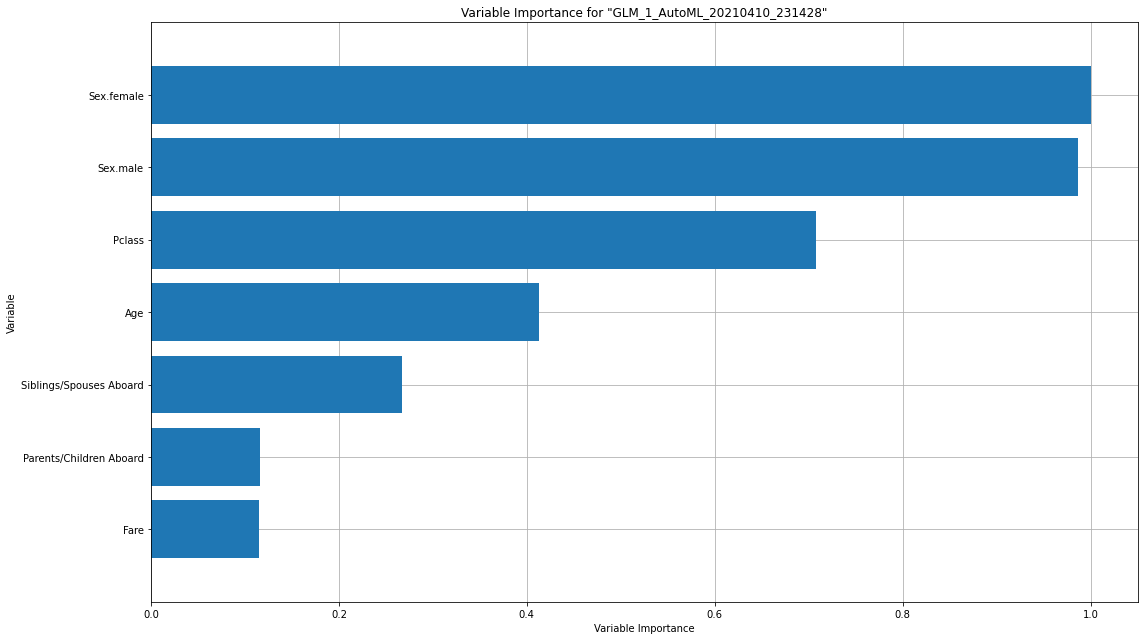

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

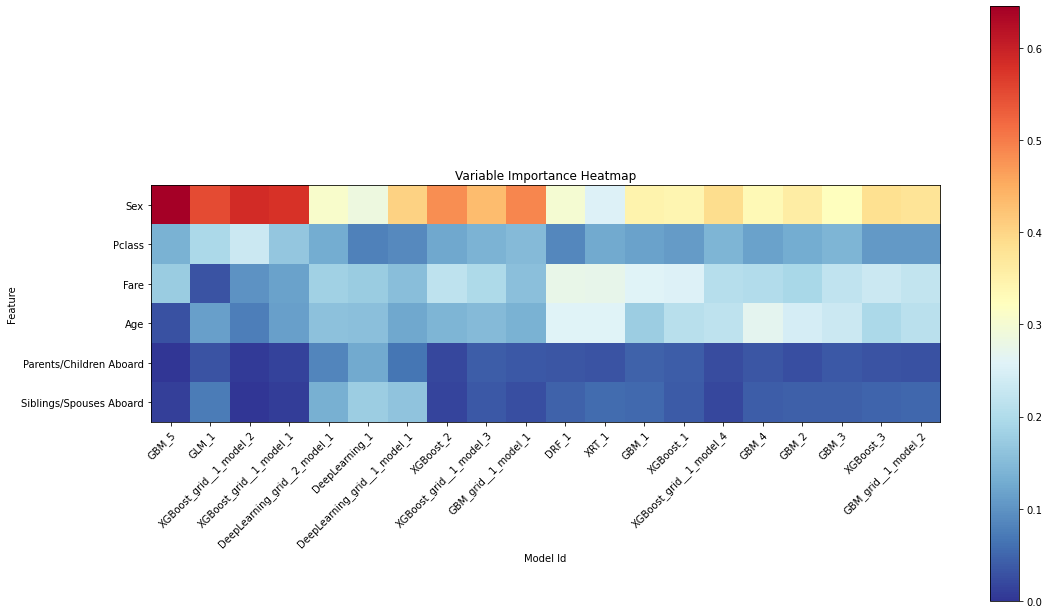

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

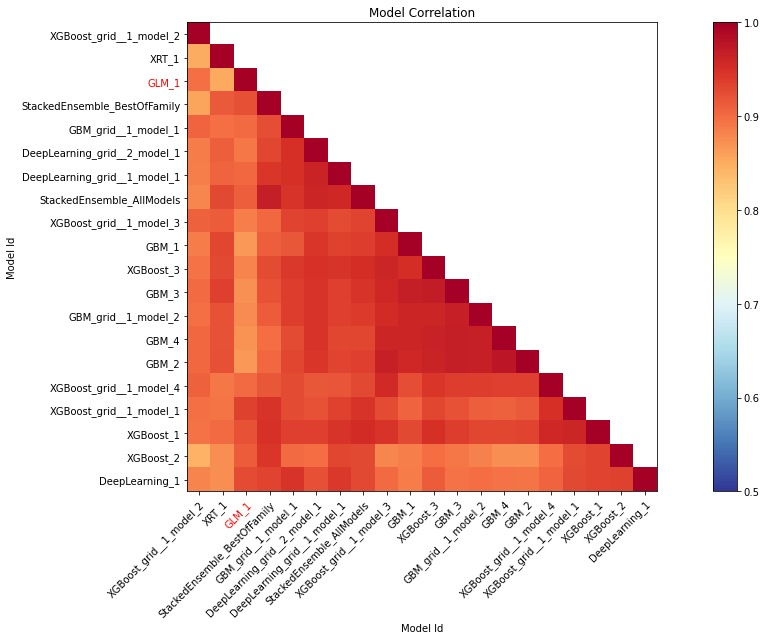

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

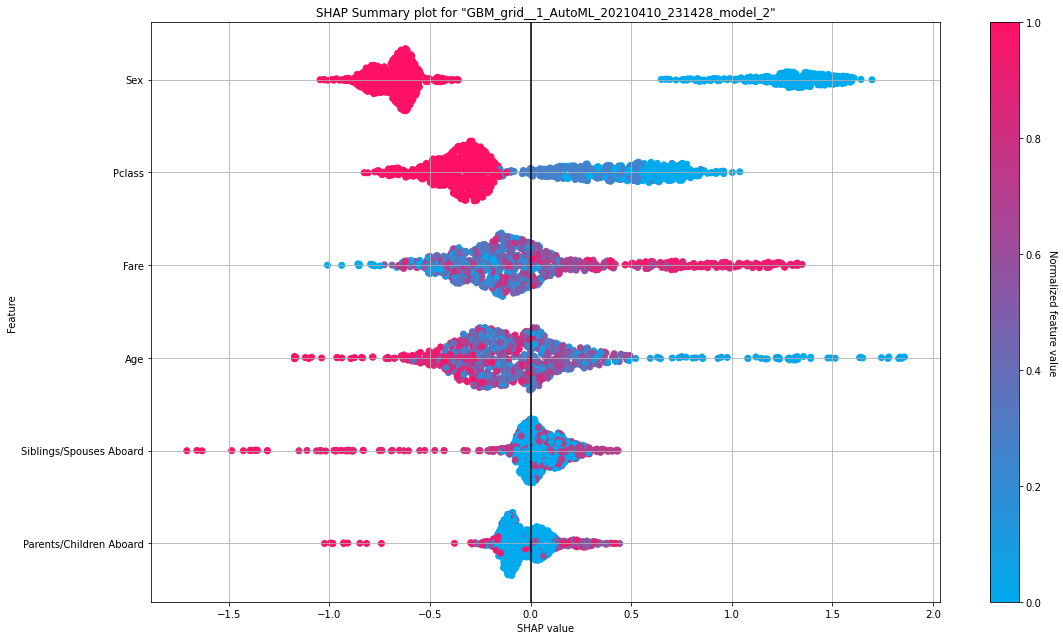

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

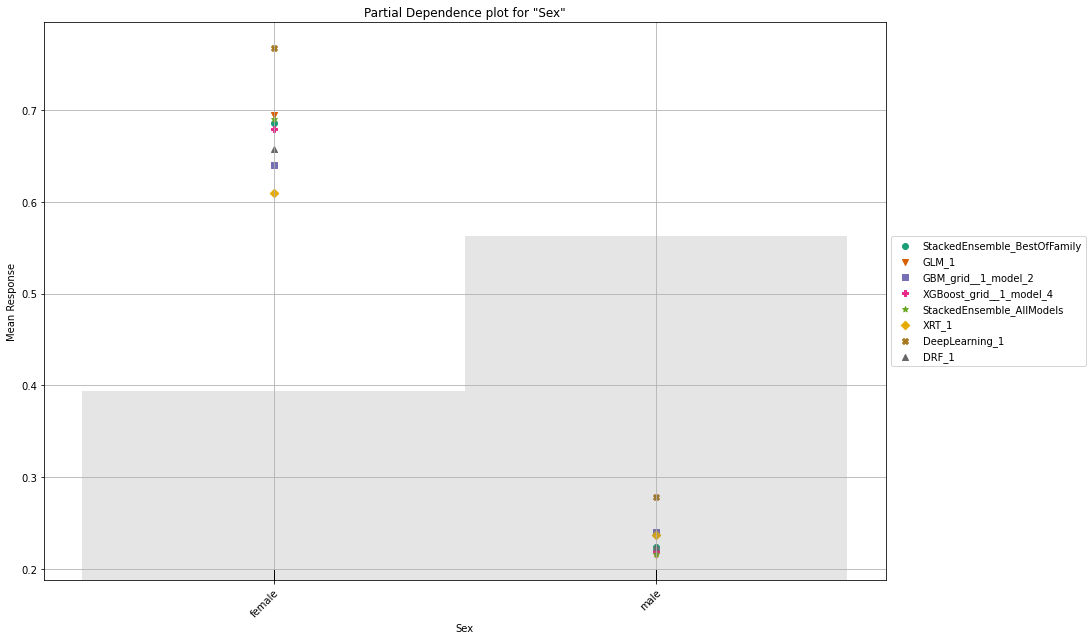

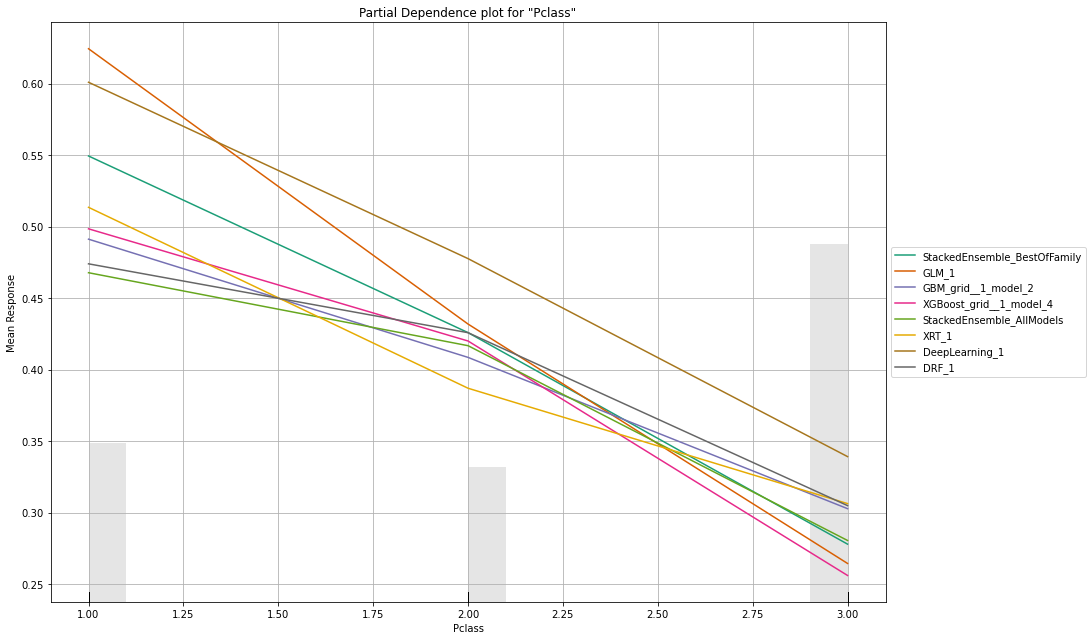

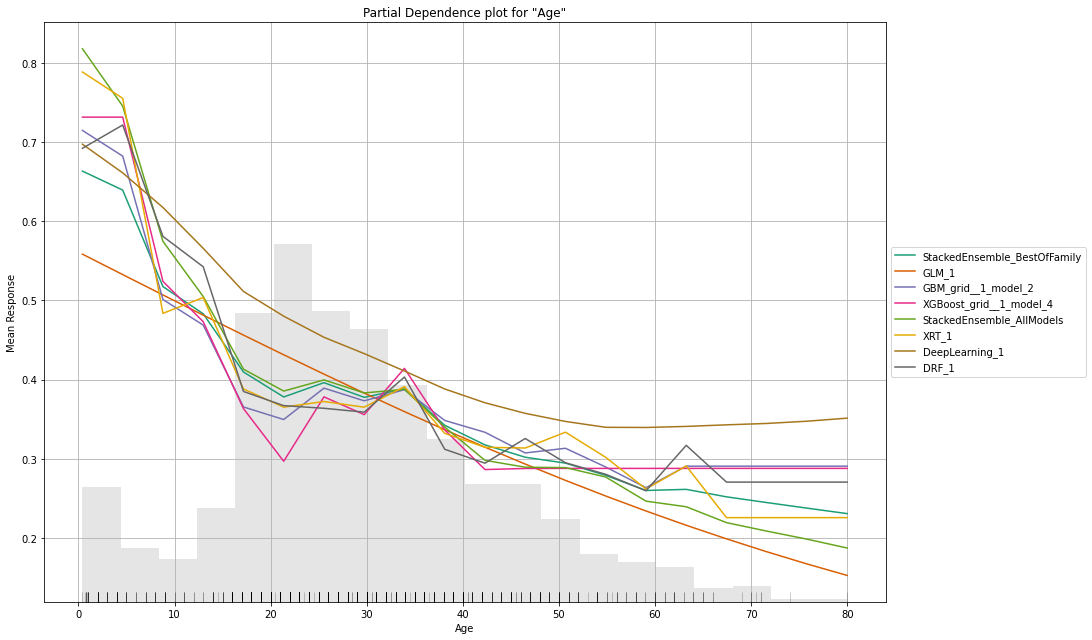

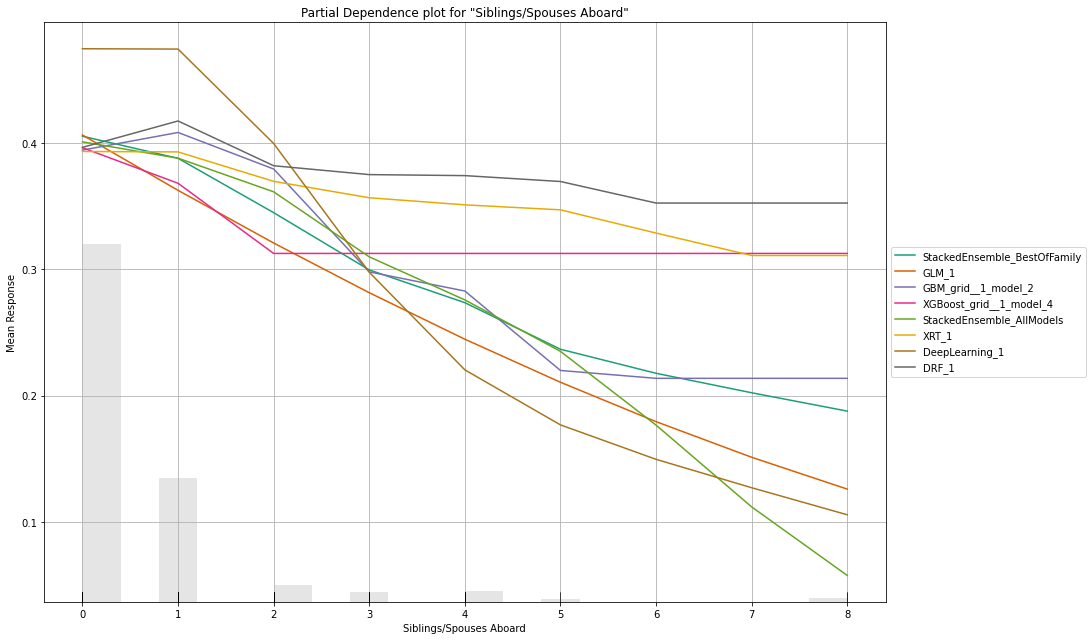

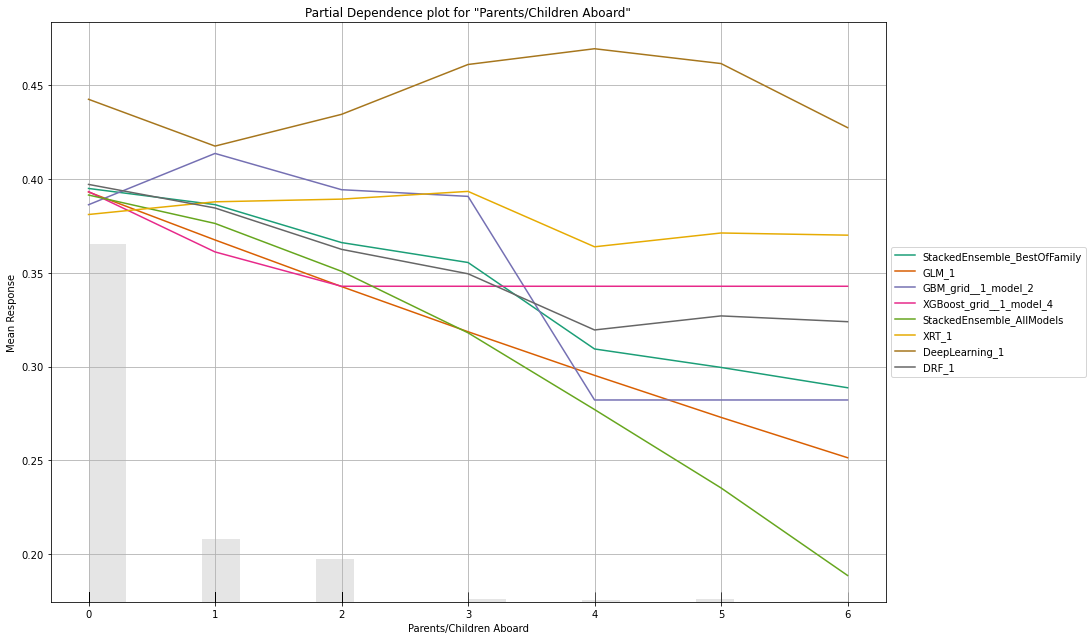

In [ ]:
exa = aml.explain(titanic_ds)


In [ ]:
t_pred=aml.leader.predict(t_test)
t_pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
1,0.384841,0.615159
0,0.911025,0.0889753
1,0.476975,0.523025
1,0.228179,0.771821
1,0.262476,0.737524
0,0.76604,0.23396
1,0.556582,0.443418
1,0.42109,0.57891
1,0.407303,0.592697
1,0.0955183,0.904482


In [ ]:
perf= aml.leader.model_performance(titanic_ds)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.10648023732943648
RMSE: 0.3263130970853553
LogLoss: 0.35182534405400206
Null degrees of freedom: 886
Residual degrees of freedom: 880
Null deviance: 1182.8138671050795
Residual deviance: 624.1381603517997
AIC: 638.1381603517997
AUC: 0.9234266859810075
AUCPR: 0.903857199055143
Gini: 0.846853371962015

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4741038695303881: 


,,0,1,Error,Rate
0,0,496.0,49.0,0.0899,(49.0/545.0)
1,1,72.0,270.0,0.2105,(72.0/342.0)
2,Total,568.0,319.0,0.1364,(121.0/887.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.474104,0.816944,176.0
1,max f2,0.243597,0.849582,252.0
2,max f0point5,0.597937,0.868107,129.0
3,max accuracy,0.515895,0.868095,158.0
4,max precision,0.980614,1.000000,0.0
5,max recall,0.110418,1.000000,344.0
6,max specificity,0.980614,1.000000,0.0
7,max absolute_mcc,0.515895,0.719047,158.0
8,max min_per_class_accuracy,0.359942,0.845872,212.0
9,max mean_per_class_accuracy,0.443538,0.850298,185.0



Gains/Lift Table: Avg response rate: 38.56 %, avg score: 38.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010147,0.976012,2.593567,2.593567,1.000000,0.979492,1.000000,0.979492,0.026316,0.026316,159.356725,159.356725,0.026316
1,2,0.020293,0.971230,2.593567,2.593567,1.000000,0.972732,1.000000,0.976112,0.026316,0.052632,159.356725,159.356725,0.052632
2,3,0.030440,0.966399,2.593567,2.593567,1.000000,0.968994,1.000000,0.973739,0.026316,0.078947,159.356725,159.356725,0.078947
3,4,0.040586,0.964478,2.593567,2.593567,1.000000,0.965544,1.000000,0.971691,0.026316,0.105263,159.356725,159.356725,0.105263
4,5,0.050733,0.956130,2.593567,2.593567,1.000000,0.960649,1.000000,0.969482,0.026316,0.131579,159.356725,159.356725,0.131579
5,6,0.100338,0.905083,2.534623,2.564426,0.977273,0.935381,0.988764,0.952623,0.125731,0.257310,153.462254,156.442605,0.255475
6,7,0.149944,0.840586,2.534623,2.554566,0.977273,0.869573,0.984962,0.925148,0.125731,0.383041,153.462254,155.456624,0.379371
7,8,0.204059,0.740704,2.269371,2.478934,0.875000,0.791887,0.955801,0.889808,0.122807,0.505848,126.937135,147.893444,0.491169
8,9,0.299887,0.572842,2.105366,2.359561,0.811765,0.649145,0.909774,0.812904,0.201754,0.707602,110.536636,135.956118,0.663566
9,10,0.400225,0.395611,1.107366,2.045631,0.426966,0.489001,0.788732,0.731700,0.111111,0.818713,10.736579,104.563051,0.681099


In [ ]:
perf.auc()

0.9234266859810075

In [ ]:
perf.accuracy()

[[0.5158948281533401, 0.8680947012401353]]

In [ ]:
aml.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/StackedEnsemble_BestOfFamily_AutoML_20210410_231428.zip'